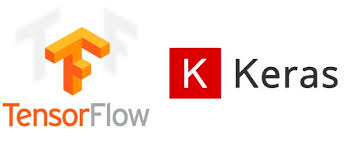

<div style="direction:rtl">
    
# Batch and Stochastic Training
در این بخش به دونوع روش یادگیری یعنی یادگیری دسته ای و یادگیری تصادفی اشاره خواهیم کرد برای این منظور از یک مثال رگرسیونی استفاده می کنیم

</div>


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()
sess = tf.Session()

<div style="direction:rtl">
    
# Stochastic Training

در ابتدا 100 نمونه داده تصادفی با `Normal(mean = 1, sd = 0.1)` ایجاد می کنیم. برجسبی که باید پیش بینی شود نیز آرایه ای شامل 100 داده با مقدار 10 می باشد.  برای این منظور از placeholderها استفاده می کنیم
</div>


In [2]:
x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10., 100)
x_data = tf.placeholder(shape=[1], dtype=tf.float32)
y_target = tf.placeholder(shape=[1], dtype=tf.float32)

<div style="direction:rtl">
    
### Model Variables and Operations: 
</div>
<div style="direction:rtl">
متغییرها و عملیات اساسی گراف محاسباتی را تعریف می کنیم 
</div>


In [3]:
# Create variable (one model parameter = A)
A = tf.Variable(tf.random_normal(shape=[1]))

# Add operation to graph
my_output = tf.multiply(x_data, A)

<div style="direction:rtl">
    
### Loss Function

برای تابع هزینه نیز می توان از هر یک از توابع بررسی شده استفاده کرد
`tf.square()`

`tf.abs()`
</div>


In [4]:
# Add L2 loss operation to graph
loss = tf.square(my_output - y_target)

<div style="direction:rtl">
حال مقدار نرخ یادگیری را تنظیم می کنیم
</div>

`0.05`

In [5]:
# Create Optimizer
my_opt = tf.train.GradientDescentOptimizer(0.02)
train_step = my_opt.minimize(loss)

# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)


<div style="direction:rtl">

### Train Model
برای یادگیری مدل در حالت یادگیری تصادفی 100 بار ایندکس های تصادفی تولید می کنیم و داده های آن را به مدل می دهیم. 

</div>


In [6]:
loss_stochastic = []
# Run Loop
for i in range(100):
    rand_index = np.random.choice(100)
    rand_x = [x_vals[rand_index]]
    rand_y = [y_vals[rand_index]]
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1)%5==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
        print('Loss = ' + str(temp_loss))
        loss_stochastic.append(temp_loss)

Step #5 A = [0.7960285]
Loss = [86.053535]
Step #10 A = [2.471164]
Loss = [64.47591]
Step #15 A = [3.8417199]
Loss = [44.54799]
Step #20 A = [4.9670258]
Loss = [22.767113]
Step #25 A = [5.8935404]
Loss = [33.894203]
Step #30 A = [6.6284733]
Loss = [5.660053]
Step #35 A = [7.285611]
Loss = [17.564713]
Step #40 A = [7.83872]
Loss = [8.268715]
Step #45 A = [8.241636]
Loss = [1.2447753]
Step #50 A = [8.486165]
Loss = [3.8029344]
Step #55 A = [8.840672]
Loss = [0.92252684]
Step #60 A = [9.084418]
Loss = [0.28699067]
Step #65 A = [9.159272]
Loss = [0.02137505]
Step #70 A = [9.329619]
Loss = [5.239698]
Step #75 A = [9.548372]
Loss = [2.143943]
Step #80 A = [9.624486]
Loss = [0.7650026]
Step #85 A = [9.680753]
Loss = [0.24468605]
Step #90 A = [9.610402]
Loss = [1.6393199]
Step #95 A = [9.7652025]
Loss = [2.5296109]
Step #100 A = [9.896589]
Loss = [1.0418236]


# Batch Training

------------------
<div style="direction:rtl">
در این روش یادگیری داده ها را به صورت دسته دسته به مدل جهت یادگیری می دهند دو نوع تولید این دسته ها وجود دارد یک روش این است که ترتیب داده ها در آن ها حفظ شود روش دیگر تولید به صورت تصادفی است که ما از روش تولید تصادفی استفاده می کنیم.
</div>



In [8]:
# Batch Training:
# Re-initialize graph
ops.reset_default_graph()
sess = tf.Session()

<div style="direction:rtl">
برای یادگیری دسته ای ما باید اندازه ی دسته ها را مشخص کنیم. اندازه دسته بسیار مهم می باشد شاید انتخاب مقدار بزرگ آن منجر به  یادگیری بهتر شود و شاید باعث شود در  local minimum گیر کند بنابراین باید در انتخاب آن دقت شود. در اینجا ما برای 100 داده اندازه دسته را برابر 25 در نظر می گیریم که این مقدار باعث تولید خروجی بهینه می شود
</div>


In [9]:
# Declare batch size
batch_size = 25



<div style="direction:rtl">
    
### Generate the Data

در ابتدا 100 نمونه داده تصادفی با `Normal(mean = 1, sd = 0.1)` ایجاد می کنیم. برجسبی که باید پیش بینی شود نیز آرایه ای شامل 100 داده با مقدار 10 می باشد.  برای این منظور از placeholderها  استفاده می کنیم با این تفاوت که مقدار `shape=[None, 1]` به خاطر این که دسته ای داده ها را به مدل می فرستیم در نظر می گیریم 
</div>

In [10]:
# Create data
x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10., 100)
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

<div style="direction:rtl">
    
### Model Variables and Operations: 
</div>
<div style="direction:rtl">
متغییرها و عملیات اساسی گراف محاسباتی را تعریف می کنیم 
</div>


In [11]:
# Create variable (one model parameter = A)
A = tf.Variable(tf.random_normal(shape=[1,1]))

# Add operation to graph
my_output = tf.matmul(x_data, A)

<div style="direction:rtl">
    
### Loss Function

برای تابع هزینه نیز می توان از هر یک از توابع بررسی شده استفاده کرد
`tf.square()`

`tf.abs()`
</div>

In [12]:
# Add L2 loss operation to graph
loss = tf.reduce_mean(tf.square(my_output - y_target))

<div style="direction:rtl">
 مقدار نرخ یادگیری را تنظیم می کنیم
</div>

`0.05`

In [13]:
# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

# Create Optimizer
my_opt = tf.train.GradientDescentOptimizer(0.02)
train_step = my_opt.minimize(loss)


<div style="direction:rtl">

### Train Model
برای یادگیری مدل در حالت یادگیری دسته ای  100 بار 25 ایندکس های تصادفی تولید می کنیم و داده های آن را به مدل می دهیم. 

</div>


In [14]:
loss_batch = []
# Run Loop
for i in range(100):
    rand_index = np.random.choice(100, size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1)%5==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
        print('Loss = ' + str(temp_loss))
        loss_batch.append(temp_loss)

Step #5 A = [[0.9117577]]
Loss = 82.40538
Step #10 A = [[2.558241]]
Loss = 56.25383
Step #15 A = [[3.912009]]
Loss = 36.75014
Step #20 A = [[5.024383]]
Loss = 25.93097
Step #25 A = [[5.9372153]]
Loss = 17.568354
Step #30 A = [[6.683322]]
Loss = 12.016499
Step #35 A = [[7.2868595]]
Loss = 8.360529
Step #40 A = [[7.7908187]]
Loss = 6.091572
Step #45 A = [[8.202731]]
Loss = 4.6663265
Step #50 A = [[8.550257]]
Loss = 2.6649234
Step #55 A = [[8.822377]]
Loss = 2.023124
Step #60 A = [[9.042502]]
Loss = 1.6088028
Step #65 A = [[9.222628]]
Loss = 1.3784866
Step #70 A = [[9.373068]]
Loss = 1.1294712
Step #75 A = [[9.501908]]
Loss = 1.5284507
Step #80 A = [[9.590317]]
Loss = 1.0312262
Step #85 A = [[9.678565]]
Loss = 0.7533774
Step #90 A = [[9.742566]]
Loss = 1.2613764
Step #95 A = [[9.777033]]
Loss = 0.77804774
Step #100 A = [[9.821016]]
Loss = 0.90492433


# Plot Stochastic vs Batch Training


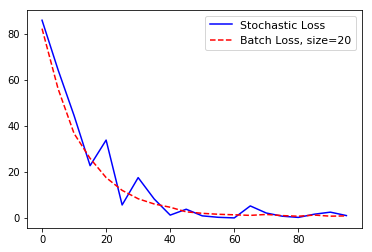

In [19]:
plt.plot(range(0, 100, 5), loss_stochastic, 'b-', label='Stochastic Loss')
plt.plot(range(0, 100, 5), loss_batch, 'r--', label='Batch Loss, size=20')
plt.legend(loc='upper right', prop={'size': 11})
plt.show()

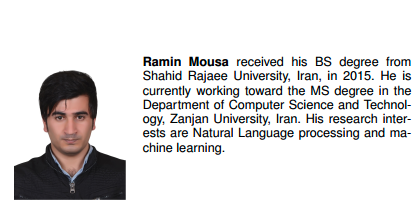